# Notebook5: Simulationen + GLM

### Erzeugung von Zufallszahlen


Das Erzeugen von Zufallszahlen ist eine häufige Anforderung in vielen Programmiersprachen, einschließlich Python. Python bietet eine integrierte Bibliothek namens "random", die Funktionen und Methoden zur Generierung von Zufallszahlen bereitstellt.

Um die "random"-Bibliothek in Python zu verwenden, muss man sie zuerst importieren.
Sobald die "random"-Bibliothek importiert ist, kann man auf verschiedene Funktionen und Methoden zugreifen, um Zufallszahlen zu erzeugen. Hier sind einige der häufig verwendeten Funktionen:



1. `random.random()`: Diese Funktion gibt eine Zufallszahl zwischen 0 und 1 zurück. Jede mögliche Zahl hat die gleiche Wahrscheinlichkeit.



In [ ]:
import random
import numpy as np
random.seed(42)
x = random.random()
print(x)



2. `random.randint(a, b)`: Diese Funktion gibt eine Zufallszahl zwischen den angegebenen Ganzzahlen a und b (einschließlich a und b) zurück.



In [ ]:
x = random.randint(1, 10)
print(x)

3. `random.choice(sequence)`: Diese Funktion gibt ein zufälliges Element aus einer gegebenen Sequenz zurück. Die Sequenz kann eine Liste, ein Tupel oder eine Zeichenkette sein.



In [ ]:
fruits = ["Apple", "Banana", "Orange"]
random_fruit = random.choice(fruits)
print(random_fruit)


Das sind nur einige Beispiele für die Verwendung der "random"-Bibliothek in Python. Es gibt noch viele weitere Funktionen und Methoden, mit denen man verschiedene Arten von Zufallszahlen erzeugen kann, einschließlich Gleitkommazahlen, zufälliger Auswahl aus einer Liste und vielem mehr.

Es ist jedoch wichtig zu beachten, dass Zufallszahlen in Computern nicht wirklich zufällig sind, sondern auf deterministischen Algorithmen basieren. Für Reproduzierbarkeit, kannst du den Startwert des Zufallszahlengenerators mit der Funktion `random.seed()` festlegen.


### Verteilungen:


#### Normalverteilung

In [ ]:
mean = 0  # Mittelwert
std_dev = 1  # Standardabweichung
num_samples = 10  # Anzahl der Zufallszahlen

samples = np.random.normal(loc = mean,
                        scale = std_dev,
                        size = num_samples)
print(samples)

#### Poissonverteilung

In [ ]:
lambda_ = 2.0  # Parameter für die Poissonverteilung
num_samples = 10  # Anzahl der Zufallszahlen

samples = np.random.poisson(lambda_, num_samples)
print(samples)

#### Binomialvertreilung

In [ ]:
n = 10  # Anzahl der Versuche
p = 0.7  # Wahrscheinlichkeit für einen "Erfolg"
num_samples = 10  # Anzahl der Zufallszahlen

samples = np.random.binomial(n, p, num_samples)
print(samples)

### Kleine Simulation
In diesem Beispiel werden zwei unabhängige Variablen `X1` und `X2` simuliert. Die abhängige Variable `Y_linear` hat einen linearen Zusammenhang mit den unabhängigen Variablen, während `Y_interaction` zusätzlich einen Interaktionszusammenhang zwischen `X1` und `X2` aufweist. Die Daten werden in einem Pandas DataFrame gespeichert und anschließend angezeigt.

Man kann die Parameter und Verteilungen entsprechend anpassen, um verschiedene Zusammenhänge zu simulieren.


In [ ]:
import pandas as pd
np.random.seed(1)

# Anzahl der Datenpunkte
n = 200

# Simulierte unabhängige Variable X1
X1 = np.random.uniform(low = 0, high = 10, size = n)

# Simulierte unabhängige Variable X2
X2 = np.random.uniform(low = 0, high = 5, size = n)

# Simulierter abhängiger Variablen Y mit linearem Zusammenhang
Y_linear = 2 * X1 + 3 * X2 + np.random.normal(
    loc = 0, scale = 1, size = n)

# Simulierter abhängiger Variablen Y mit Interaktionszusammenhang
Y_interaction = 2 * X1 + 3 * X2 + 2 * X1 * X2 + np.random.normal(
    loc = 0, scale = 1, size = n)

# Datensatz erstellen
data = pd.DataFrame({'X1': X1,
                    'X2': X2,
                    'Y_linear': Y_linear,
                    'Y_interaction': Y_interaction})


# Daten anzeigen
print(data.head())


### Lineares Modell

In [ ]:
from sklearn.linear_model import LinearRegression

def linear_model(data, features, target):
    # Features und Zielvariablen aus dem Datensatz extrahieren
    X = data[features]
    y = data[target]

    # Lineares Regressionsmodell erstellen und anpassen
    model = LinearRegression()
    model.fit(X, y)

    # Vorhersagen für den Datensatz machen
    predictions = model.predict(X)

    return predictions

# Beispielaufruf der Funktion
features = ['X1', 'X2']
target = 'Y_linear'
predictions_linear = linear_model(data, features, target)
predictions_linear

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(data, features, target, n_estimators=100, random_state=None):
    # Features und Zielvariablen aus dem Datensatz extrahieren
    X = data[features]
    y = data[target]

    # Random Forest Regressor erstellen und anpassen
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X, y)

    # Vorhersagen für den Datensatz machen
    predictions = model.predict(X)

    return predictions

# Beispielaufruf der Funktion
features = ['X1', 'X2']
target = 'Y_interaction'
predictions_rf = random_forest(data, features, target, n_estimators=100, random_state=42)



#### Ergebnisse mittels RMSE vergleichen:

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(predictions, actual_values):
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

# Beispielaufruf der Funktionen
actual_values = data[target]

# RMSE für das lineare Modell berechnen
rmse_linear = calculate_rmse(predictions_linear, actual_values)
print("RMSE Linear Regression:", rmse_linear)

# RMSE für den Random Forest berechnen
rmse_rf = calculate_rmse(predictions_rf, actual_values)
print("RMSE Random Forest:", rmse_rf)


In [ ]:
help(np.random.Generator)

Hierbei fällt auf, dass der Randomforest einen deutlich geringeren RMSE hat obwohl der
 Datengenerierende Prozesse genau der Idee eines linearen Modells entsprechen sollte

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Funktion zum Berechnen des RMSE
def calculate_rmse(predictions, actual_values):
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

# Simulierte Daten generieren
np.random.seed(42)
n = 1000

X1 = np.random.uniform(low=0, high=10, size=n)
X2 = np.random.uniform(low=0, high=5, size=n)
X_interaction = X1 * X2  # Interaktionsterm
Y = 2 * X1 + 3 * X2 + 5 * X_interaction + np.random.default_rng(seed = 42).normal(loc = 0, scale = 5, size = n)

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    np.column_stack((X1, X2, X_interaction)), Y, test_size=0.2, random_state=42
)

# Lineares Modell ohne Interaktionsterm
linear_model_no_interaction = LinearRegression()
linear_model_no_interaction.fit(X_train[:, :2], y_train)
predictions_no_interaction = linear_model_no_interaction.predict(X_test[:, :2])
rmse_no_interaction = calculate_rmse(predictions_no_interaction, y_test)
print("Linear Model (No Interaction) RMSE:", rmse_no_interaction)

# Lineares Modell mit Interaktionsterm
linear_model_with_interaction = LinearRegression()
linear_model_with_interaction.fit(X_train, y_train)
predictions_with_interaction = linear_model_with_interaction.predict(X_test)
rmse_with_interaction = calculate_rmse(predictions_with_interaction, y_test)
print("Linear Model (With Interaction) RMSE:", rmse_with_interaction)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
rmse_rf = calculate_rmse(predictions_rf, y_test)
print("Random Forest RMSE:", rmse_rf)

In diesem Skript wird ein Datensatz mit einem Interaktionsterm simuliert, indem Zufallsvariablen für X1, X2 und X_interaction generiert werden. Die abhängige Variable Y wird basierend auf diesen Variablen und einem zufälligen Rauschen erstellt.

Der Datensatz wird dann in Trainings- und Testdaten mit einem Verhältnis von 80:20 aufgeteilt. Anschließend werden ein lineares Modell ohne Interaktionsterm, ein lineares Modell mit Interaktionsterm und ein Random Forest auf den Trainingsdaten trainiert.

Die Vorhersagen der Modelle auf den Testdaten werden verwendet, um den RMSE für jedes Modell zu berechnen und auszugeben. Ein niedrigerer RMSE deutet auf eine bessere Modellleistung hin.

#### Lineares Model: Diagnose

Wir haben uns bisher auf Prediction fokusiert. Inferenz und
Modeldiagnose sind jedoch 2 weitere wichtige Aspekte der statistischen
Analyse. Wir schauen uns nochmal ein lineares Model an.

In [ ]:
n = 200
X1 = np.random.uniform(low = 0, high = 10, size = n)
X2 = np.random.uniform(low = 0, high = 5, size = n)
Y_linear = 2 * X1 -5 * X2 + np.random.default_rng(seed = 42).normal(loc = 0, scale = 1, size = n)
df = pd.DataFrame({'X1': X1,
                    'X2': X2,
                    'Y_linear': Y_linear})
df

Ein guter Startpunkt für weitere Analysen ist is oft das visualisieren
der Daten.

In [ ]:
#Plot der einzelnen Achsen:
import matplotlib.pyplot as plt
plt.scatter("X1", "Y_linear", data=df)

In [ ]:
plt.scatter("X2", "Y_linear", data=df)

In [ ]:
#3D Plot:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z= "Y_linear")
fig.show()

In [ ]:
X = df[["X1", "X2"]]
y = df["Y_linear"]

model = LinearRegression()
model.fit(X, y)

den klassischen summary() Befehl aus R gibt es in python nicht. Wir 
müssen auf die uns interssierenden Modelparameter einzeln zugreifen.

In [ ]:
model.coef_ #Betas

In [ ]:
model.intercept_ #Achsenabschnitt

Note: In scikit-learn zeigt der Unterstrich am Ende eines Attributnamens, wie bei coef_, dass dieses Attribut nach dem Anpassen des Modells erstellt oder befüllt wird. Diese Namenskonvention dient dazu, zwischen Parametern zu unterscheiden, die beim Initialisieren des Modells gesetzt werden, und Attributen, die während des Anpassungsprozesses aus den Daten abgeleitet werden.

In [ ]:
model.score(X, y) #R quadrat

Sklearn hat keine inbuilt Möglichkeit t-Werte oder p-Werte auszugeben, 
der Fokus liegt auf Prediction. Um trotzdem t- und p- Werte zu 
bestimmen brauchen wir das statsmodels package.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Create and fit the OLS (Ordinary Least Squares) model
X = sm.add_constant(X) #intercept ist nicht standardmäßig im model.
model = sm.OLS(y, X)
model = model.fit()

# Print the summary which includes p-values
print(model.summary())

In [ ]:
x1_line = np.linspace(min(X["X1"]), max(X["X1"]), n)
x2_line = np.zeros_like(x1_line)
np.column_stack((x1_line, x2_line))

In [ ]:
# X Werte für Reg. Line bei x2 = 0
x0_line = np.array([0]*n)
x1_line = np.linspace(min(X["X1"]), max(X["X1"]), n)
x2_line = np.zeros_like(x1_line)

# Predictions
Y_line = model.predict(np.column_stack((x0_line, x1_line, x2_line)))

# Scatter
plt.scatter(X1, y, label='Data')

# Regression line assuming x2 = 0
plt.plot(x1_line, Y_line, color='red', label='Regression Line (x2=0)')

#### GLM: Logistic Regression

Manchmal ist der Zusammenhang den wir beobachten nicht linear. Weiterhin
kann es vorkommen, dass die Annahme der normalverteilten Störterme 
keinen Sinn macht. Beobachten wir zum Beispiel die Varable "überlebt" 
im Kontext der Titanic, so gibt es nur 2 Merkmalsausprägungen: 0 = tot,
1 = überlebt. Ein normalverteilter Störterm macht da keinen Sinn, da 
dieser automatisch Werte wie zum Beispiel 1,22321 oder -0.2324 möglich 
machen würde. Abhilfe schaffen gerneralized linear models (GLM).

Wir starten mit der logistischen Regression:

$$
\mathbb{E}[Y|X] = P(Y=1|X) = \frac{1}{1 + \exp\left(-(\beta_0 + \beta_1 \cdot X)\right)}
$$

Die Verteilungsannahme für die logistische Regression besagt, dass 
die abhängige Variable einer binomialverteilten Zufallsvariablen folgt. 
Diese Annahme kann wie folgt dargestellt werden:

- $Y_i$ ist die beobachtete Anzahl der Erfolge für den $i$-ten Fall,
- $n_i$ ist die Anzahl der Versuche oder Beobachtungen für den $i$-ten Fall, und
- $p_i$ ist die Wahrscheinlichkeit des Erfolgs für den $i$-ten Fall.

Mathematisch ausgedrückt lautet die Verteilungsannahme:

$Y_i \sim \text{Binomial}(n_i, p_i)$

In [ ]:
import seaborn as sns

# Titanic-Datensatz von seaborn laden
titanic_data = sns.load_dataset('titanic')

# Zugriff auf die Spalten "age" (Alter) und "survived" (Überleben)
age = titanic_data['age']
survived = titanic_data['survived']

In [ ]:
# Scatter Plot von Alter gegen Überleben
plt.scatter(age, survived, alpha=0.5)

# Achsenbeschriftung
plt.xlabel('Alter')
plt.ylabel('Überlebt')

# Plot anzeigen
plt.show()

In [46]:
# Auswahl der 'age'- und 'survived'-Spalten
data = titanic_data[['age', 'survived']].copy()

# Entfernen von Zeilen mit fehlenden Werten
data.dropna(inplace=True)

Note: Copies vs. Views

In [44]:
#Note:

np1 = np.array([1, 2, 3, 4, 5])

print("np1_old:", np1)
#np2 = np1.view() #gleich wie: np2 = np1
np2 = np1.copy()

np2[0] = 33

print("np1:", np1)  
print("np2:", np2)

# Gilt auch für andere python objects:
list_a = [1, 2, 3]
list_b = list_a

list_b.append(4)

print(list_a)  # Output: [1, 2, 3, 4]
print(list_b)  # Output: [1, 2, 3, 4]


np1_old: [1 2 3 4 5]
np1: [1 2 3 4 5]
np2: [33  2  3  4  5]
[1, 2, 3, 4]
[1, 2, 3, 4]


In [47]:
# Umwandeln von 'survived' in binäre 0/1-Werte
data['survived'] = data['survived'].astype(int)

# Hinzufügen einer konstanten Spalte für den Intercept-Term
data['intercept'] = 1

# Definition der Prädiktor- und Zielvariablen
X = data[['intercept', 'age']]
y = data['survived']

# Erstellen und Anpassen des logistischen Regressionsmodells
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

# Ausgabe der Zusammenfassung des logistischen Regressionsmodells
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                0.004445
Time:                        10:16:51   Log-Likelihood:                -480.11
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                   0.03839
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0567      0.174     -0.327      0.744      -0.397       0.283
age           -0.0110      0.

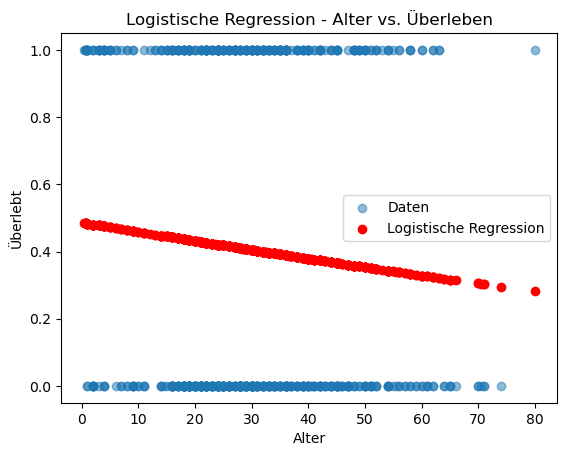

In [48]:
predictions = logit_results.predict(X)
plt.scatter(data['age'], data['survived'], alpha=0.5, label='Daten')

plt.scatter(data['age'], predictions, color='red', label='Logistische Regression')


plt.xlabel('Alter')
plt.ylabel('Überlebt')
plt.title('Logistische Regression - Alter vs. Überleben')


plt.legend()
plt.show()

#### GLM: Possion Regression

Modellgleichung des Poisson-Modells:
$ \log(\lambda_i) = \beta_0 + \beta_1 \cdot X_i $ 

also:

$ E(Y_i|X_i) = \lambda_i = e^{\beta_0 + \beta_1 \cdot X_i} $

Verteilungsannahme:
$ Y_i \sim \text{Poisson}(\lambda_i) $

In der Modellgleichung repräsentiert $ Y_i $ die beobachtete Anzahl der 
Ereignisse (z.B. Fahrradüberquerungen) für den i-ten Datenpunkt. $ X_i $ 
ist der Prädiktorwert für den i-ten Datenpunkt, und $ \lambda_i $ ist 
der Erwartungswert der Poisson-Verteilung, der von den Prädiktoren 
abhängt.

Die Modellgleichung verwendet die Log-Transformation, um die lineare 
Beziehung zwischen den Prädiktoren und dem Erwartungswert $ \lambda_i $ 
zu modellieren. Die Koeffizienten $ \beta_0 $ und $ \beta_1 $ geben die 
Auswirkung der Prädiktoren auf den Log-Erwartungswert an.

Die Verteilungsannahme besagt, dass die beobachteten Ereignisse $ Y_i $ 
einer Poisson-Verteilung folgen. Diese Verteilungsannahme ist 
angemessen, wenn die Ereignisse zufällig auftreten und die Ereignisrate 
$ \lambda_i $ proportional zu den Prädiktoren ist.

Hinweis: $ \log(\lambda_i) $ wird auch als Link-Funktion bezeichnet und 
wird verwendet, um die lineare Beziehung zwischen den Prädiktoren und 
dem Erwartungswert $ \lambda_i $ zu modellieren.

In [49]:
# Load the dataset
data = pd.read_csv('data/NB5/nyc-east-river-bicycle-counts.csv')
data.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [50]:
# Calculate the average temperature
data['avg_temp'] = (data['High Temp (°F)'] + data['Low Temp (°F)']) / 2
data.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,avg_temp
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,72.05
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,51.95
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,36.95
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335,38.60
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471,34.10


In [51]:
X = sm.add_constant(data['avg_temp'])
y = data['Total']

# Poisson Regression Modell erstellen und anpassen
poisson_modell = sm.GLM(y, X, family=sm.families.Poisson())
poisson_results = poisson_modell.fit()

# Modellzusammenfassung anzeigen
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4827e+05
Date:                Wed, 26 Jun 2024   Deviance:                   2.9417e+05
Time:                        10:20:37   Pearson chi2:                 2.71e+05
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1461      0.003   2390.129      0.0

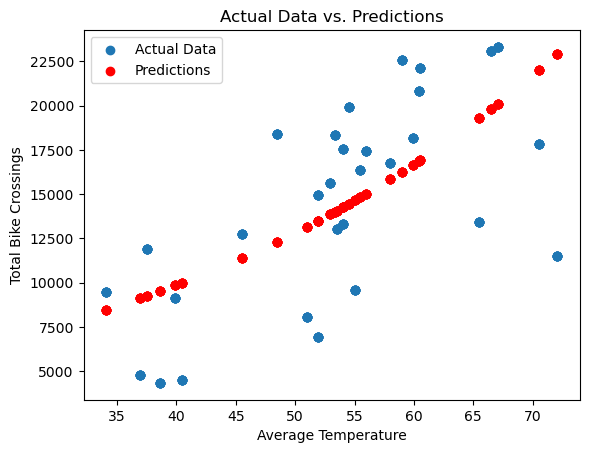

In [52]:
# Predictions:
predictions = poisson_results.predict(X)

# Plot:
plt.scatter(data['avg_temp'], data['Total'], label='Actual Data')
plt.scatter(data['avg_temp'], predictions, color='red', label='Predictions')
plt.xlabel('Average Temperature')
plt.ylabel('Total Bike Crossings')
plt.legend()
plt.title('Actual Data vs. Predictions')
plt.show()